# Company Bankruptcy
Company bankruptcy happens when a company can't pay its debts, leading to asset liquidation to repay creditors and possibly halting operations.

## Why Study Past Bankruptcies?

- **Risk Awareness**: Helps investors identify and reduce financial risks.
- **Industry Insight**: Reveals market trends and challenges for better business analysis.
- **Learning Opportunities**: Offers lessons to improve decision-making and avoid mistakes.
- **Regulatory Guidance**: Aids in shaping regulations to protect stakeholders.
- **Strategic Guidance**: Provides struggling companies with strategies for recovery.

## About the dataset

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange (TWSE).

Data collected includes company's bankrupted due to the effects of Dotcom Bubble (late 1990s and early 2000s) and Global Financial crisis (2007 - 2008).

## Analysis Start

In [1]:
!pip install ppscore
!pip install lime
!pip install lazypredict
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.1.3

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.4 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=387da626750a3ff8e5c19d3ce14ffba12e494bdc45a61bb5681ba424111cad9a
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which i

In [ ]:
# Importing Libraries

## Data manipulation
import numpy as np
import pandas as pd

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Sklearn functions
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
#Lazy Predict
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
## Imblearn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, KMeansSMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# LGBM
from lightgbm import LGBMClassifier
## Predictive power score
import ppscore as pps


## Scipy functions
from scipy.stats import randint

## XGBoost models
from xgboost import XGBClassifier

## LIME
import lime
import lime.lime_tabular
from __future__ import print_function

np.random.seed(1)

In [ ]:
# Defining functions

## Oversampler
def oversample_data(sampler,X,y):
    return(sampler.fit_resample(X, y))

# Calculation of performance metrics
def perf_metrics(y_true, y_pred_binary):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary,average='binary')
    recall = recall_score(y_true, y_pred_binary,average='binary')
    f1 = f1_score(y_true, y_pred_binary,average='binary')

    # Create dictionary to store metrics
    metrics_dict = {
        'accuracy': round(accuracy*100,2),
        'balanced_accuracy' : round(balanced_accuracy*100,2),
        'precision': round(precision*100,2),
        'recall': round(recall*100,2),
        'f1_score': round(f1*100,2)
    }

    return metrics_dict

In [ ]:
company_df = pd.read_csv("data.csv")
company_df = company_df.rename(columns=lambda x: x.strip())

In [ ]:
company_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,...,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,...,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,...,0.77,0.04,0.62,0.60,0.84,0.29,0.03,0.56,1,0.02
3,1,0.40,0.45,0.46,0.58,0.58,1.00,0.80,0.81,0.30,...,0.74,0.00,0.62,0.58,0.83,0.28,0.03,0.56,1,0.02
4,1,0.47,0.54,0.52,0.60,0.60,1.00,0.80,0.81,0.30,...,0.80,0.00,0.62,0.60,0.84,0.28,0.02,0.58,1,0.04


In [ ]:
# Renaming Bankrupt column
company_df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace = True)

In [ ]:
# Dimension
print("\nData dimension :")
print("Number of Records : ",company_df.shape[0],"\nNumber of Features : ",company_df.shape[1])

# Datatype of columns
print("\nDatatype of Features :")
print(company_df.dtypes.value_counts())

# Missing values
print("\nMissing values :")
na_value_check = company_df.isna().sum()
if len(na_value_check[na_value_check > 0]) == 0 :
    print("Missing values not identified")
else :
    print(na_value_check[na_value_check > 0])

# Duplicated records check
print("\nDuplicated records :")
duplicate_rows = company_df.duplicated()
if len(company_df[duplicate_rows]) == 0:
    print("Duplicated records not identified")
else :
    print("Number of duplicated records :",len(company_df[duplicate_rows]))


Data dimension :
Number of Records :  6819 
Number of Features :  96

Datatype of Features :
float64    93
int64       3
dtype: int64

Missing values :
Missing values not identified

Duplicated records :
Duplicated records not identified


### 🎢Correlation study

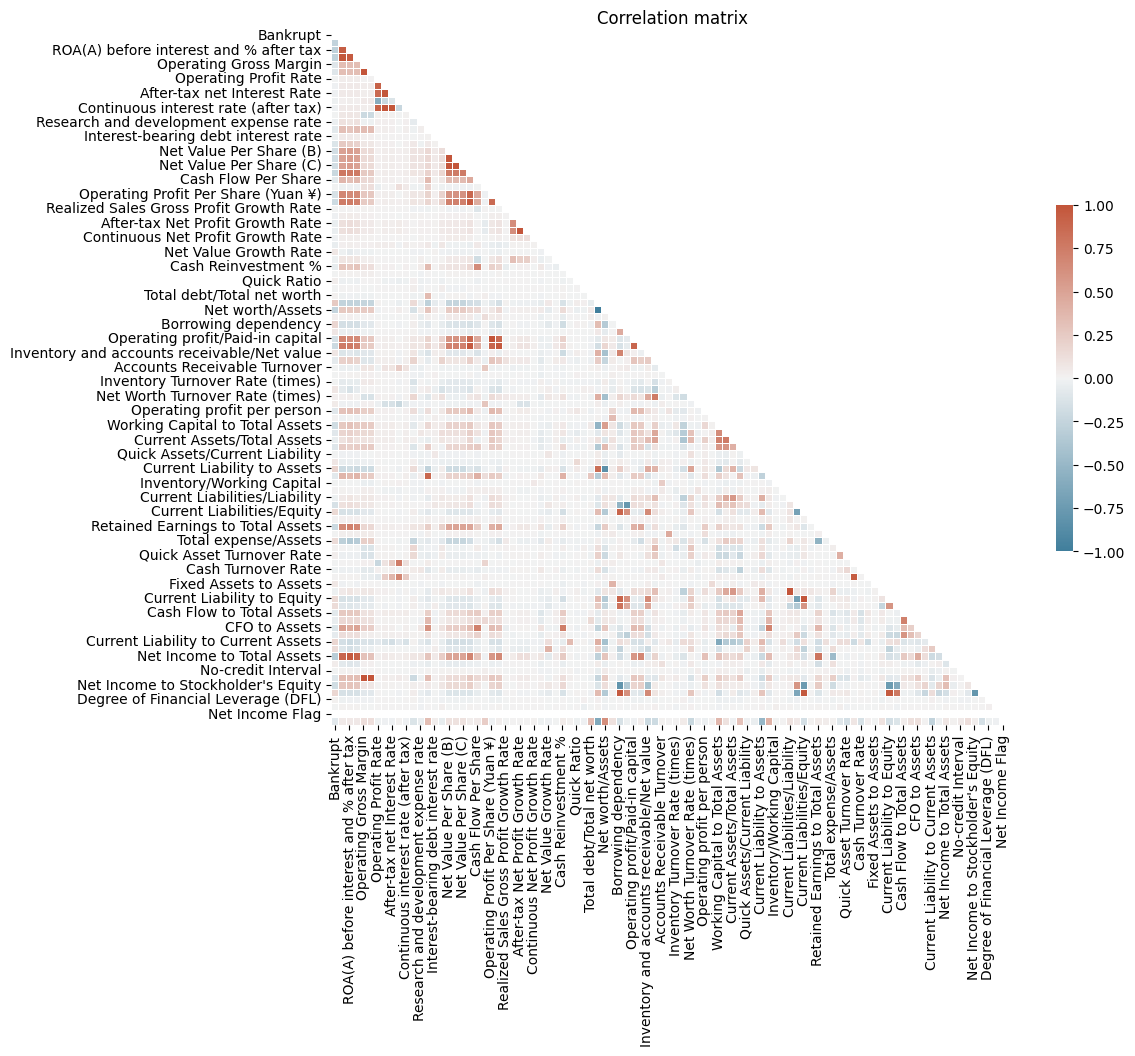

In [ ]:
# Correlation

# Compute the correlation matrix
corr = company_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation matrix")
plt.show()

Distribution of categorical columns

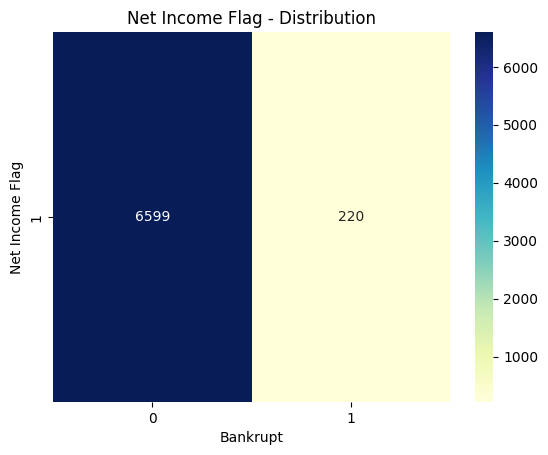

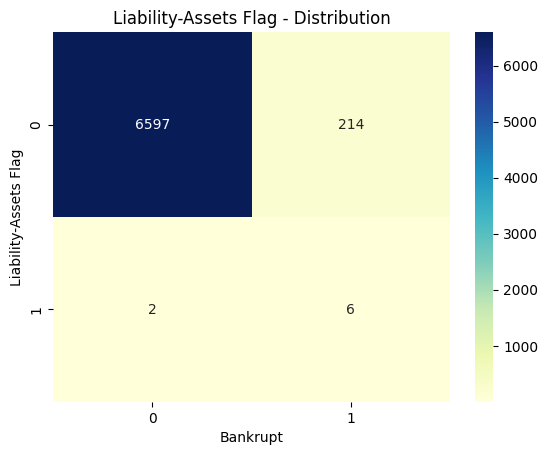

In [ ]:
sns.heatmap(pd.crosstab(company_df['Net Income Flag'],company_df["Bankrupt"]), annot=True, cmap="YlGnBu",fmt=".0f")
plt.title("Net Income Flag - Distribution")
plt.show()

sns.heatmap(pd.crosstab(company_df['Liability-Assets Flag'],company_df["Bankrupt"]), annot=True, cmap="YlGnBu",fmt=".0f")
plt.title("Liability-Assets Flag - Distribution")
plt.show()

In [ ]:
# Droping Net income flag column
company_df.drop(['Net Income Flag'],axis = 1,inplace=True)

## Curse of dimensionality

In [ ]:
# Train and Test split
X = company_df.drop(['Bankrupt'],axis=1)
y = company_df.Bankrupt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

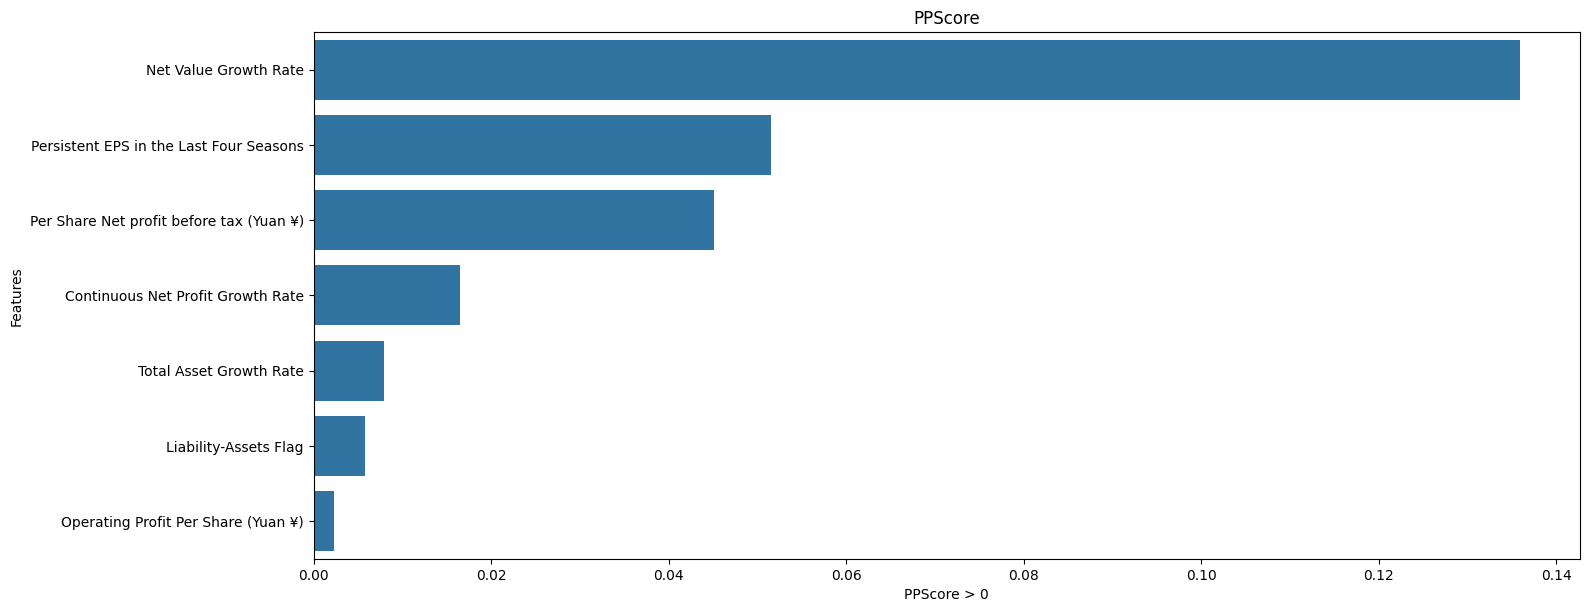

In [ ]:
# Calculating Predictive power score (PPS)
pps_input_df = X_train.copy()
pps_input_df['Bankrupt'] = y_train.astype(str).copy()
pps_df = pps.predictors(pps_input_df, y="Bankrupt")
pps_df = pps_df[pps_df.ppscore > 0]

# Plotting PPS
plt.figure(figsize=(16,6))
sns.barplot(data=pps_df, x="ppscore", y="x")
plt.ylabel("Features")
plt.xlabel("PPScore > 0")
plt.tight_layout()
plt.title("PPScore")
plt.show()

In [ ]:
pps_df.sort_values(by=['ppscore'], ascending=False)[:10]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Net Value Growth Rate,Bankrupt,0.14,classification,True,weighted F1,0.95,0.96,DecisionTreeClassifier()
1,Persistent EPS in the Last Four Seasons,Bankrupt,0.05,classification,True,weighted F1,0.95,0.96,DecisionTreeClassifier()
2,Per Share Net profit before tax (Yuan ¥),Bankrupt,0.05,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
3,Continuous Net Profit Growth Rate,Bankrupt,0.02,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
4,Total Asset Growth Rate,Bankrupt,0.01,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
5,Liability-Assets Flag,Bankrupt,0.01,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
6,Operating Profit Per Share (Yuan ¥),Bankrupt,0.00,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()


In [ ]:
selected_features_final = pps_df.x.tolist()

In [ ]:
selected_features_final

['Net Value Growth Rate',
 'Persistent EPS in the Last Four Seasons',
 'Per Share Net profit before tax (Yuan ¥)',
 'Continuous Net Profit Growth Rate',
 'Total Asset Growth Rate',
 'Liability-Assets Flag',
 'Operating Profit Per Share (Yuan ¥)']

In [ ]:
# Get top n features
## Lets select top n features based on feature importance
top_n_req = 10

In [ ]:
# Define hyperparameters and their possible values for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30,35 ,40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Use RandomizedSearchCV for hyperparameter tuning with 5-fold cross-validation for decision tree classifier with F1 score
dt_for_feature_selection = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=dt_for_feature_selection, param_distributions=param_dist, random_state=42, scoring = 'f1')
random_search.fit(X_train, y_train)

# Pring best params
print("Best parameters based on Random search :")
print(random_search.best_params_)

# Pring best score from CV
print("\nBest parameters based on Random search :")
print("F1 Score : ",round(random_search.best_score_,2))

Best parameters based on Random search :
{'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'entropy'}

Best parameters based on Random search :
F1 Score :  0.32


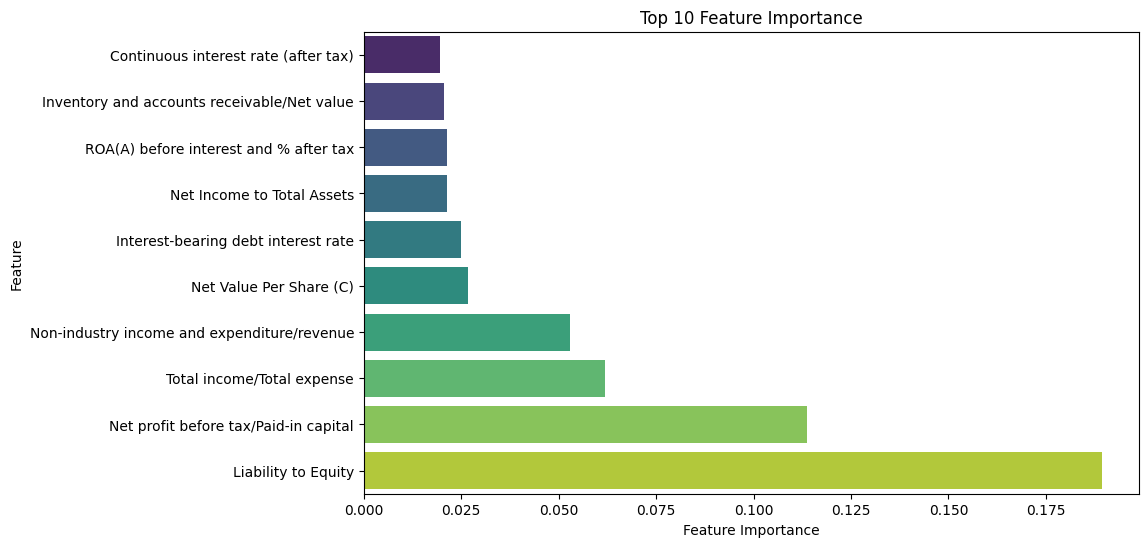

In [ ]:
# Get best decision tree model
best_dt_classifier = random_search.best_estimator_

# Extract feature importances from the trained decision tree classifier
feature_importances = best_dt_classifier.feature_importances_
feature_names = best_dt_classifier.feature_names_in_

# Get the indices of the top n features
top_n_indices = np.argsort(feature_importances)[-top_n_req:]

# Create a DataFrame for easier plotting with seaborn
feature_importance_df = pd.DataFrame({'Feature': [feature_names[i] for i in top_n_indices],
                                      'Importance': feature_importances[top_n_indices]})

# Plot the top 10 features using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance")
plt.title("Top "+str(top_n_req)+" Feature Importance")
plt.show()

In [ ]:
# Selecting above features for EDA and model building
selected_features_final = list(set(selected_features_final + feature_importance_df.Feature.to_list()))
selected_features_final.sort()

In [ ]:
print("Selected features :")
print(selected_features_final)
print("\nNumber of features selected :")
print(len((selected_features_final)))

Selected features :
['Continuous Net Profit Growth Rate', 'Continuous interest rate (after tax)', 'Interest-bearing debt interest rate', 'Inventory and accounts receivable/Net value', 'Liability to Equity', 'Liability-Assets Flag', 'Net Income to Total Assets', 'Net Value Growth Rate', 'Net Value Per Share (C)', 'Net profit before tax/Paid-in capital', 'Non-industry income and expenditure/revenue', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Persistent EPS in the Last Four Seasons', 'ROA(A) before interest and % after tax', 'Total Asset Growth Rate', 'Total income/Total expense']

Number of features selected :
17


In [ ]:
# Removing Train and Test variables
del(X_train, X_test, y_train, y_test)

# Data Analysis

In [ ]:
company_df[selected_features_final].describe()

,Continuous Net Profit Growth Rate,Continuous interest rate (after tax),Interest-bearing debt interest rate,Inventory and accounts receivable/Net value,Liability to Equity,Liability-Assets Flag,Net Income to Total Assets,Net Value Growth Rate,Net Value Per Share (C),Net profit before tax/Paid-in capital,Non-industry income and expenditure/revenue,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Persistent EPS in the Last Four Seasons,ROA(A) before interest and % after tax,Total Asset Growth Rate,Total income/Total expense
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.22,0.78,16448012.91,0.40,0.28,0.00,0.81,1566212.06,0.19,0.18,0.30,0.11,0.18,0.23,0.56,5508096595.25,0.00
std,0.01,0.01,108275033.53,0.01,0.01,0.03,0.04,114159389.52,0.03,0.03,0.01,0.03,0.03,0.03,0.07,2897717771.17,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.78,0.00,0.40,0.28,0.00,0.80,0.00,0.17,0.17,0.30,0.10,0.17,0.21,0.54,4860000000.00,0.00
50%,0.22,0.78,0.00,0.40,0.28,0.00,0.81,0.00,0.18,0.18,0.30,0.10,0.18,0.22,0.56,6400000000.00,0.00
75%,0.22,0.78,0.00,0.40,0.28,0.00,0.83,0.00,0.20,0.19,0.30,0.12,0.19,0.24,0.59,7390000000.00,0.00
max,1.00,1.00,990000000.00,1.00,1.00,1.00,1.00,9330000000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9990000000.00,1.00


In [ ]:
number_inf = pd.DataFrame(company_df[(company_df == np.inf) | (company_df == np.nan)].count())

number_inf.columns = ["Count"]
number_inf['Features'] = number_inf.index

number_inf.reset_index(drop = True,inplace = True)
number_inf[["Features", "Count"]]
number_inf = number_inf[number_inf.Count > 0]
if len(number_inf) == 0 :
    print("Inf and NAN is not present")
else:
    print(number_inf)

Inf and NAN is not present


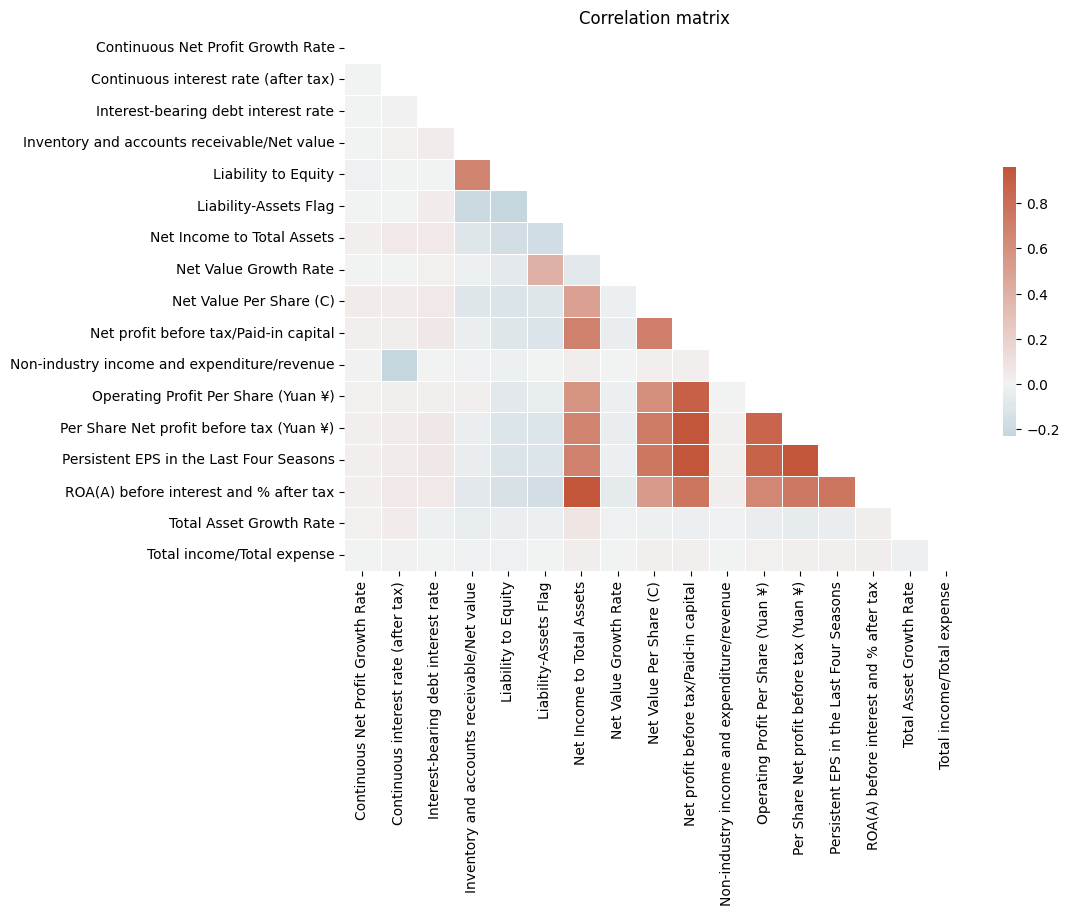

In [ ]:
# Correlation

# Compute the correlation matrix
corr = company_df[selected_features_final].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation matrix")
plt.show()

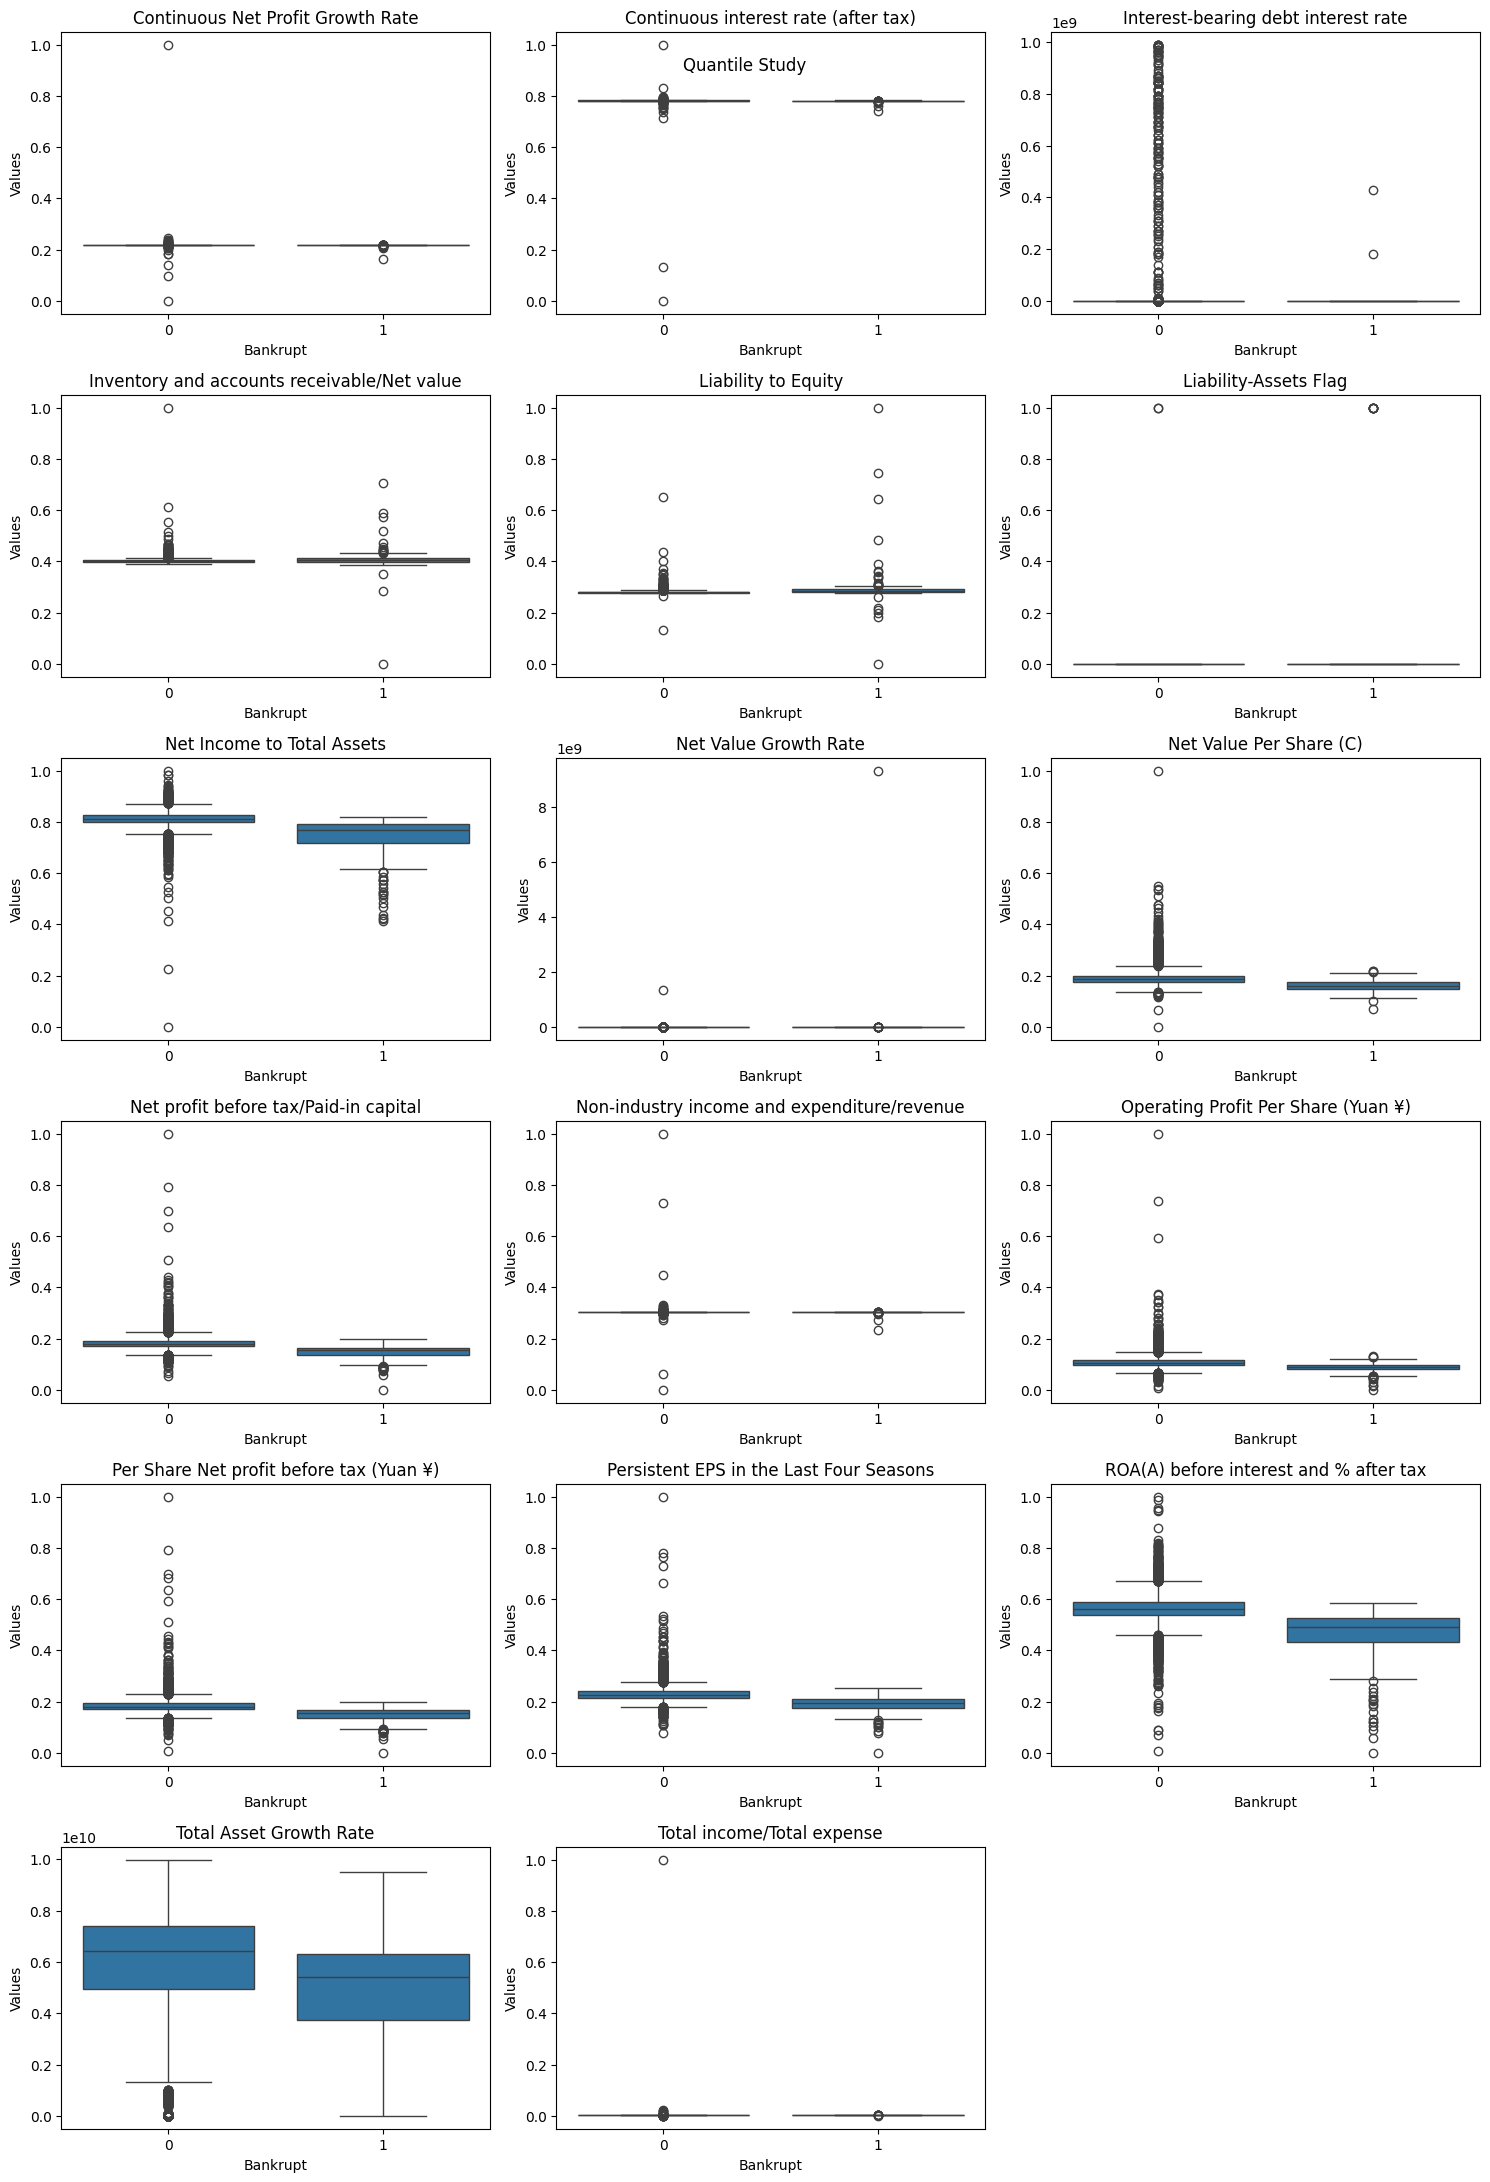

In [ ]:
features_to_plot = selected_features_final.copy()
features_to_plot

# Create a new figure
fig = plt.figure(figsize=(15, 25))

# Iterate through each column in the given list
for i, col in enumerate(features_to_plot, start=1):
    plt.subplot(7,3, i)

    # Plot the boxplot for the current column using Seaborn
    sns.boxplot(data = company_df ,y=col, x= "Bankrupt" ,orient='v')

    # Set labels and title
    plt.title(col)
    plt.ylabel('Values')
    plt.xlabel('Bankrupt')

plt.tight_layout()
fig.subplots_adjust(top=0.99)
fig.suptitle("Quantile Study")
plt.show()

Observations :

We can notice that there are outliers (i.e Beyond Upper Whisker and Lower Whisker), will try to remove outliers post data analysis step

In [ ]:
# Define categories of features
categories = {
    'Financial Performance Metrics': [
        'Persistent EPS in the Last Four Seasons',
        'Per Share Net profit before tax (Yuan ¥)',
        'Operating Profit Per Share (Yuan ¥)',
        'ROA(A) before interest and % after tax',
        'Net profit before tax/Paid-in capital',
        'Net Value Per Share (C)',
        'Continuous interest rate (after tax)',
        'Continuous Net Profit Growth Rate',
        'Total Asset Growth Rate',
        'Net Value Growth Rate'
    ],
    'Financial Health and Risk Indicators': [
        'Inventory and accounts receivable/Net value',
        'Liability-Assets Flag',
        'Liability to Equity',
        'Interest-bearing debt interest rate',
        'Net Income to Total Assets'
    ],
    'Income and Expense Analysis': [
        'Non-industry income and expenditure/revenue',
        'Total income/Total expense'
    ]
}

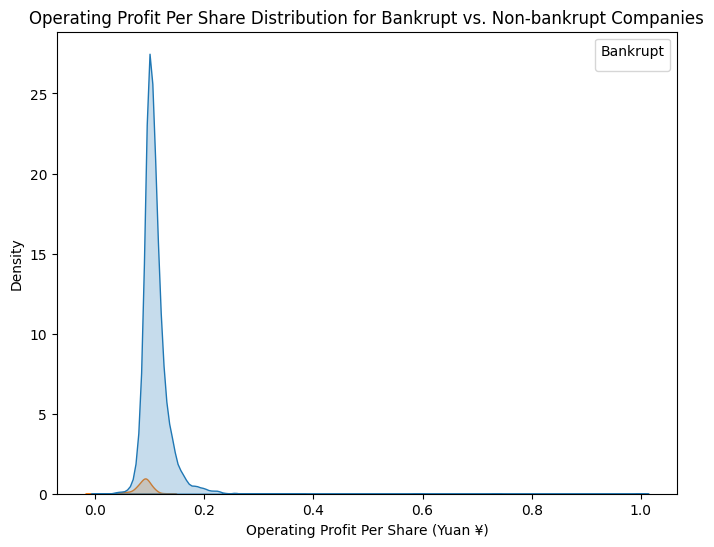

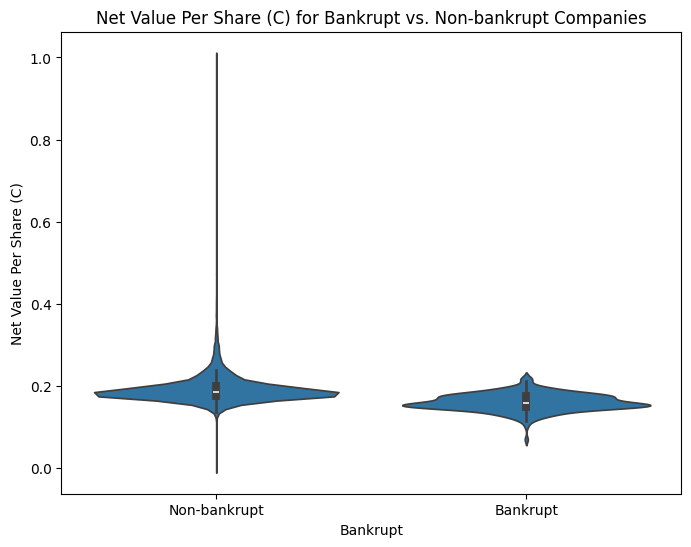

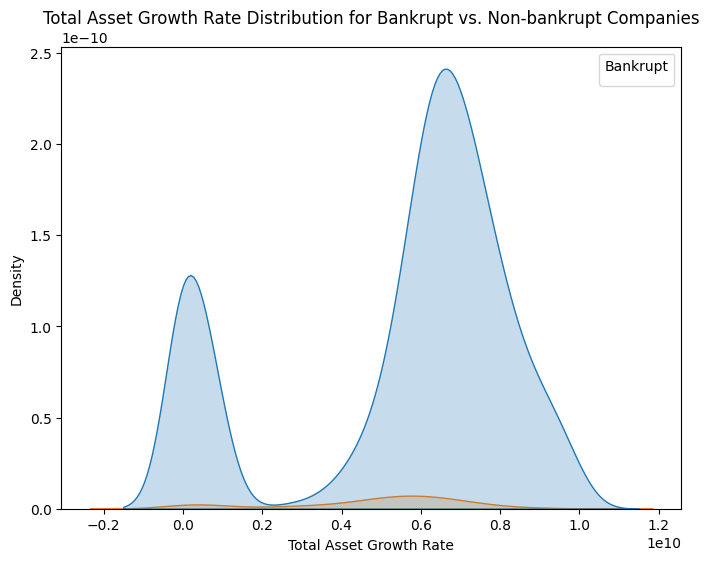

<Figure size 1200x1200 with 0 Axes>

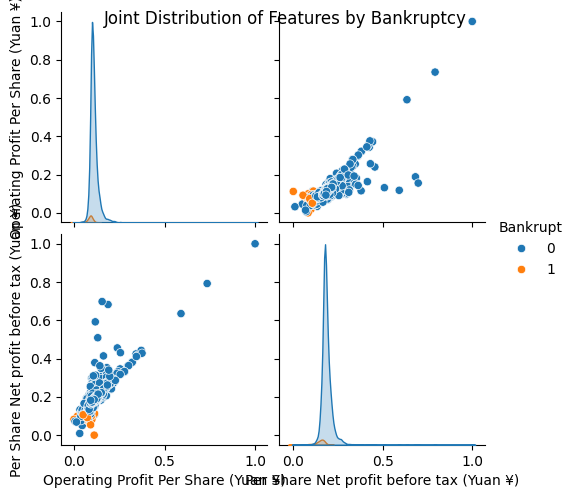

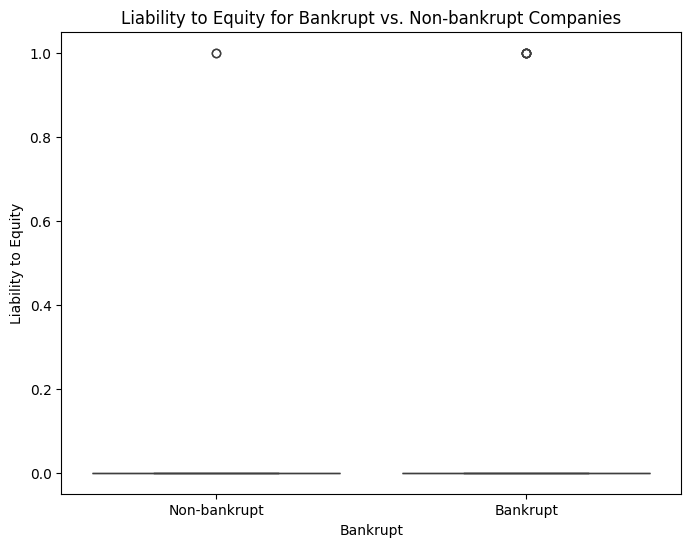

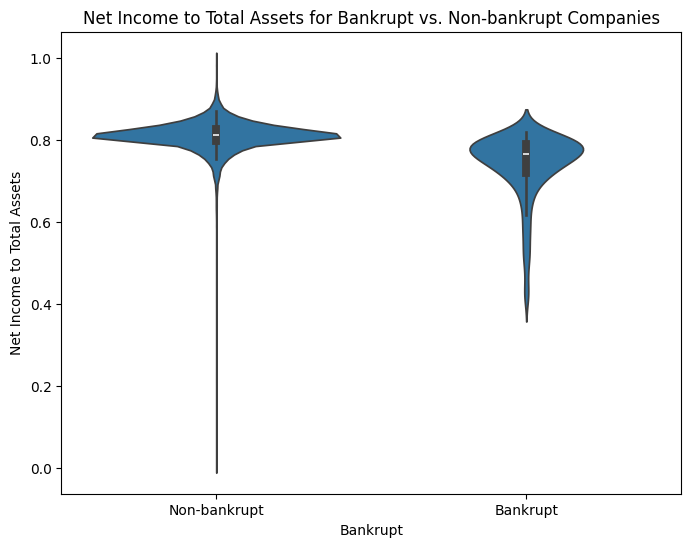

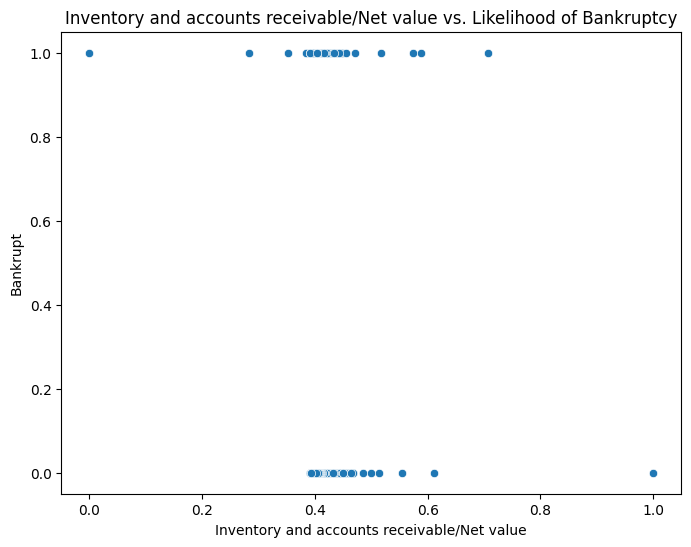

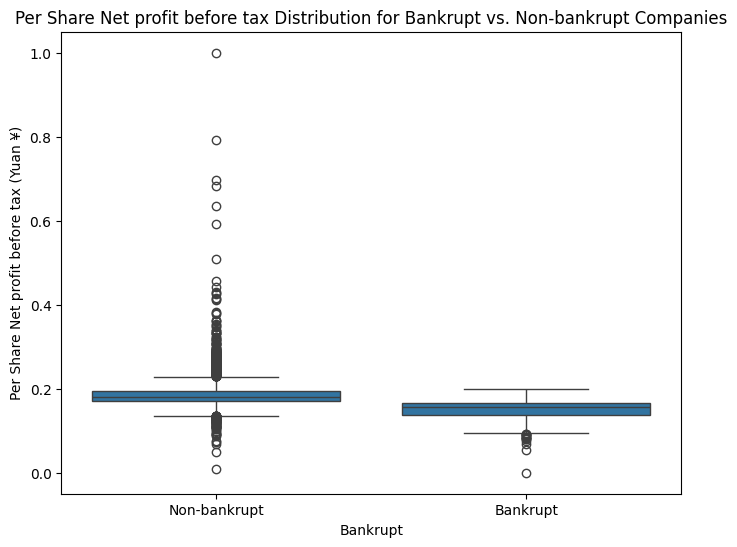

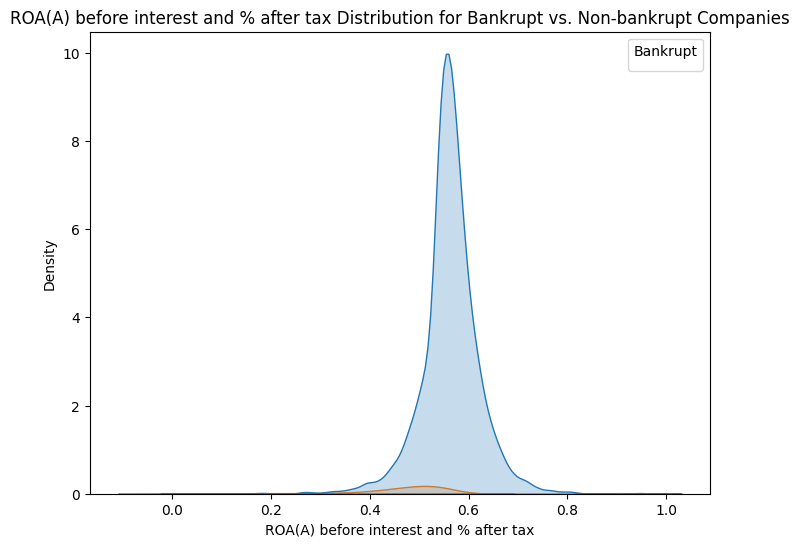

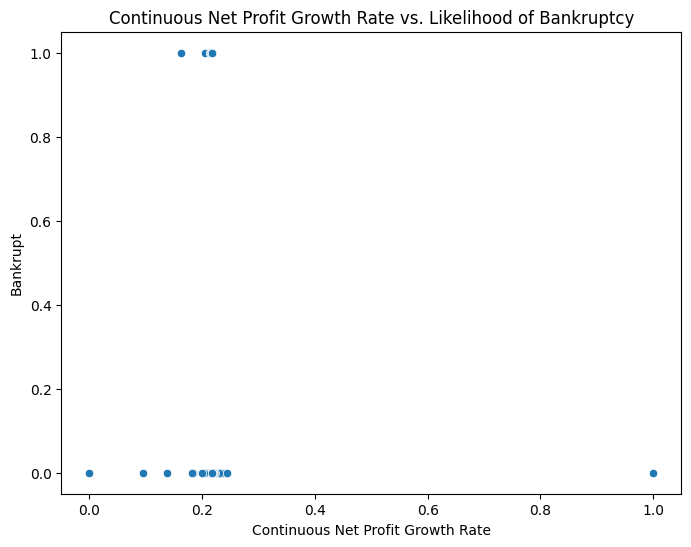

In [ ]:
# Question 1: Distribution of "Operating Profit Per Share (Yuan ¥)" for bankrupt vs. non-bankrupt companies
plt.figure(figsize=(8, 6))
sns.kdeplot(data=company_df, x='Operating Profit Per Share (Yuan ¥)', hue='Bankrupt', fill=True)
plt.title('Operating Profit Per Share Distribution for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Operating Profit Per Share (Yuan ¥)')
plt.ylabel('Density')
plt.legend(title='Bankrupt')
plt.show()

# Question 2: Difference in "Net Value Per Share (C)" between bankrupt and non-bankrupt companies
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bankrupt', y='Net Value Per Share (C)', data=company_df)
plt.title('Net Value Per Share (C) for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Bankrupt')
plt.ylabel('Net Value Per Share (C)')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.show()

# Question 3: Distributions of "Total Asset Growth Rate" for bankrupt vs. non-bankrupt companies
plt.figure(figsize=(8, 6))
sns.kdeplot(data=company_df, x='Total Asset Growth Rate', hue='Bankrupt', fill=True)
plt.title('Total Asset Growth Rate Distribution for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Total Asset Growth Rate')
plt.ylabel('Density')
plt.legend(title='Bankrupt')
plt.show()

# Question 4: Joint distribution of "Operating Profit Per Share" and "Per Share Net profit before tax" for bankrupt vs. non-bankrupt companies
plt.figure(figsize=(12, 12))
sns.pairplot(company_df, hue='Bankrupt', vars=['Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)'], diag_kind='kde')
plt.suptitle('Joint Distribution of Features by Bankruptcy')
plt.show()

# Question 5: Comparison of "Liability to Equity" for bankrupt vs. non-bankrupt companies
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bankrupt', y='Liability-Assets Flag', data=company_df)
plt.title('Liability to Equity for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Bankrupt')
plt.ylabel('Liability to Equity')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.show()

# Question 6: Distribution of "Net Income to Total Assets" for bankrupt vs. non-bankrupt companies
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bankrupt', y='Net Income to Total Assets', data=company_df)
plt.title('Net Income to Total Assets for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Bankrupt')
plt.ylabel('Net Income to Total Assets')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.show()

# Question 7: Relationship between "Inventory and accounts receivable/Net value" and likelihood of bankruptcy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Inventory and accounts receivable/Net value', y='Bankrupt', data=company_df)
plt.title('Inventory and accounts receivable/Net value vs. Likelihood of Bankruptcy')
plt.xlabel('Inventory and accounts receivable/Net value')
plt.ylabel('Bankrupt')
plt.show()

# Question 8: Distribution of "Per Share Net profit before tax" between bankrupt and non-bankrupt companies
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bankrupt', y='Per Share Net profit before tax (Yuan ¥)', data=company_df)
plt.title('Per Share Net profit before tax Distribution for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Bankrupt')
plt.ylabel('Per Share Net profit before tax (Yuan ¥)')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.show()

# Question 9: Distribution of "ROA(A) before interest and % after tax" between bankrupt and non-bankrupt companies
plt.figure(figsize=(8, 6))
sns.kdeplot(data=company_df, x='ROA(A) before interest and % after tax', hue='Bankrupt', fill=True)
plt.title('ROA(A) before interest and % after tax Distribution for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('ROA(A) before interest and % after tax')
plt.ylabel('Density')
plt.legend(title='Bankrupt')
plt.show()

# Question 10: Relationship between "Continuous Net Profit Growth Rate" and likelihood of bankruptcy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Continuous Net Profit Growth Rate', y='Bankrupt', data=company_df)
plt.title('Continuous Net Profit Growth Rate vs. Likelihood of Bankruptcy')
plt.xlabel('Continuous Net Profit Growth Rate')
plt.ylabel('Bankrupt')
plt.show()

### Target variable analysis 🎯

In [ ]:
# Converting Bankrupt column to Categorical
company_df['Bankrupt'] = company_df['Bankrupt'].astype(str)

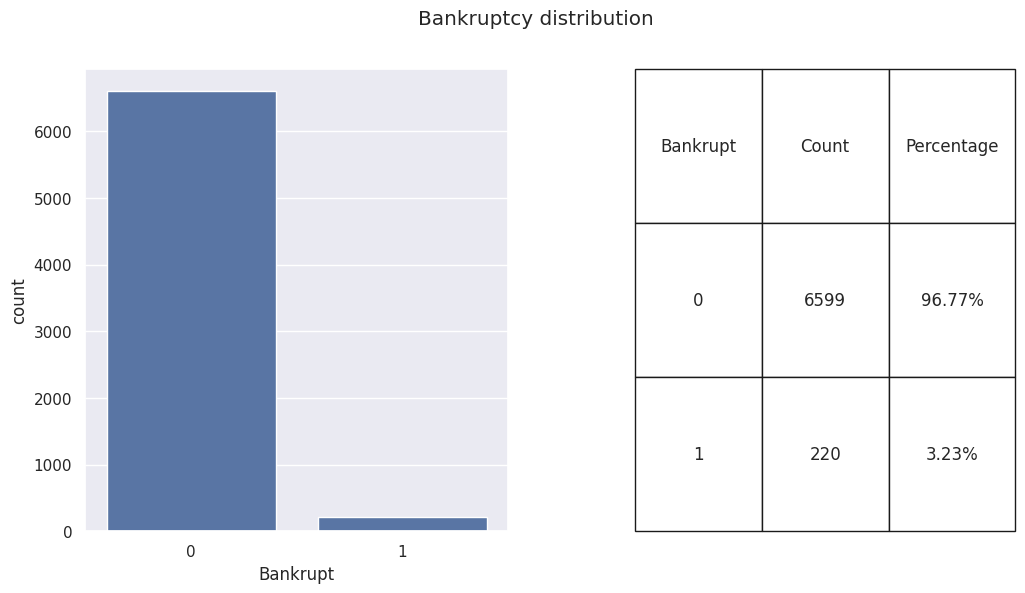

In [ ]:
# Calculate counts and percentages
count_df = company_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(company_df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=company_df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution')
plt.show()

### ⚖️ Data imbalance problem

In the plot above, we see that **Bankrupt companies** make up only **3.23% of the entire dataset**. When we split the data into training and testing sets, there will be very few samples of the "1" class (bankrupt companies) in the training set.

In real-world cases, it's common to deal with imbalanced datasets, but why is this a big issue?

Imbalanced datasets cause problems like:

- Favoring the majority class (non-bankrupt companies)
- Poor generalization to new data
- Overestimating accuracy
- Difficulty in detecting rare events (like bankrupt companies)
- Limited learning from the minority class (bankrupt companies)
- Misleading feature importance

We can fix this by oversampling or undersampling the data using different methods like **SMOTE, ADASYN, Tomek Links, Edited Nearest Neighbors**,...

**We will only use oversampling/undersampling on the training data to prevent adding any synthetic data when evaluating the models**

Decision Flow

1. Split the data into training and testing sets.
2. Set a sampling ratio between 0 and 1, increasing by 0.1 at each step. For each step:
   - Select different sampling methods: Random Oversampler, SMOTE, ADASYN, SMOTEENN, SMOTETomek.
   - Apply each algorithm to oversample the training data.
   - Train a Decision Tree model and check its performance on the test data.
3. Choose the sampling method that gives the best overall results.


# 🥼 Experimentation on Oversamplers/Hybrid Samplers

### 1. Random Oversampler
- **Definition**: Object to over-sample the minority class(es) by picking samples at random with replacement. No synthetic samples are generated from this algorithm.

### 2. SMOTE
- **Definition**: It generates synthetic minority instances by interpolating between existing minority samples, improving model performance and reducing misclassification of the minority class.
- **Issue**: Outlier points in minority samples might lead to unrealistic synthetic samples that don't represent the original data well.

### 3. Borderline SMOTE
- **Definition**: This algorithm starts by classifying the minority class observations.
    - Any minority observation is considered noise if all its neighbors belong to the majority class, and these observations are ignored while creating synthetic data (similar to DBSCAN).
    - Points with both majority and minority neighbors are classified as border points, and resampling is done from these points (these are the extreme observations that support vectors focus on).
- **Issue**: It may overemphasize extreme observations.

### 4. ADASYN
- **Definition**: ADASYN is a framework that evaluates the impurity of each minority observation's neighborhood by considering the ratio of majority to total observations in the neighborhood ('k').
    - The impurity ratio is transformed into a probability distribution to generate more synthetic points for higher-impurity observations.
- **Issues**:
    - If minority examples are sparsely distributed, neighborhoods may contain only one minority instance, and increasing the neighborhood size can help.
    - ADASYN’s adaptability might affect precision by generating more data in neighborhoods with a high presence of the majority class.

### 5. SMOTE-ENN
- **Definition**: SMOTE generates synthetic samples, while ENN undersamples noisy data points.
    - **ENN**: Removes instances misclassified by their nearest neighbors (assumed to be mislabeled or noisy).
- **Issues**:
    - It may remove useful information if majority-class instances are not truly misclassified.
    - Assumes that KNN is an accurate estimator of class membership.

### 6. SMOTE-Tomek Links
- **Definition**: SMOTE generates synthetic samples, and Tomek Links are used to undersample data points with "links."
    - **Tomek’s Link**: Exists when two samples from different classes are closest neighbors to each other.
- **Issues**:
    - **Underfitting**: Removing too many majority instances may cause underfitting.
    - **Loss of useful information**: Important data may be deleted, which can affect class boundaries.
    - **Ambiguity at class boundaries**: Removing points near class boundaries doesn’t always improve performance.

---

### References:
- [Towards Data Science: Class Imbalance - SMOTE, Borderline SMOTE, ADASYN](https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804)
- [Medium: How to Handle Imbalanced Data - Oversampling Techniques](https://indraneeldb1993ds.medium.com/how-to-handle-imbalanced-data-oversampling-techniques-a5671c6dfb60#:~:text=to%20Borderline%20SMOTE.-,Cons%3A,a%20substantial%20majority%2Dclass%20presence.)
- [Imbalanced-Learn: Under-Sampling with Tomek Links](https://imbalanced-learn.org/stable/under_sampling.html#tomek-links)


In [ ]:
# Separate features and target variable
X = company_df[selected_features_final].copy()
y = company_df['Bankrupt'].copy()

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True, stratify=y, random_state=42)

print("Target variable distribution in Train samples :")
pd.DataFrame(y_train.value_counts())

Target variable distribution in Train samples :


,Bankrupt
0,4619
1,154


### Oversampling - Train data 🔰

In [ ]:
scaler_obj = RobustScaler()
scaler_obj.fit(X_train)
X_train = scaler_obj.transform(X_train)

#### Creating a baseline decision tree model 🌴

Baseline model will be used to compare the performance of the oversampling algorithms.

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(scaler_obj.transform(X_test))

print("Performance of Decision tree with the original data (Without Synthetic train samples)")
baseline_perf = pd.DataFrame.from_dict([perf_metrics(np.array(y_test.astype(int)),np.array(y_pred.astype(int)))])
baseline_perf

Performance of Decision tree with the original data (Without Synthetic train samples)


,accuracy,balanced_accuracy,precision,recall,f1_score
0,95.21,61.64,25.76,25.76,25.76


In [ ]:
# Sampling ratio = Number of samples in minority class after resampling / Number of samples in majority class
sampling_ratios = np.arange(0.05, 0.5 ,0.05)
dt_classifier = DecisionTreeClassifier(random_state=42)
perf_os_algo = pd.DataFrame(columns=['sampling_ratio', 'algorithm', 'accuracy', 'balanced_accuracy','precision','recall','f1_score'])

for ratio in sampling_ratios :

    # Creating Oversamplers
    RANDOMOS_obj = RandomOverSampler(sampling_strategy=ratio, random_state = 42)
    SMOTE_obj = SMOTE(sampling_strategy=ratio, random_state = 42)
    ADASYN_obj = ADASYN(sampling_strategy=ratio,random_state = 42)
    SMOTEENN_obj = SMOTEENN(sampling_strategy=ratio,random_state = 42)
    SMOTETomek_obj = SMOTETomek(sampling_strategy=ratio, random_state = 42)
    BORDERSMOTE_obj = BorderlineSMOTE(sampling_strategy=ratio,random_state = 42)

    # Oversampled train samples
    X_train_os1, y_train_os1 = oversample_data(RANDOMOS_obj,X_train,y_train)
    X_train_os2, y_train_os2 = oversample_data(SMOTE_obj,X_train,y_train)
    X_train_os3, y_train_os3 = oversample_data(ADASYN_obj,X_train,y_train)
    X_train_os4, y_train_os4 = oversample_data(SMOTEENN_obj,X_train,y_train)
    X_train_os5, y_train_os5 = oversample_data(SMOTETomek_obj,X_train,y_train)
    X_train_os6, y_train_os6 = oversample_data(BORDERSMOTE_obj,X_train,y_train)

    # Preparing train samples for testing the performance
    X_train_oversampled_list = [X_train_os1,X_train_os2,X_train_os3,X_train_os4,X_train_os5,X_train_os6]
    y_train_oversampled_list = [y_train_os1,y_train_os2,y_train_os3,y_train_os4,y_train_os5,y_train_os6]
    oversampling_algo_list = ["Random oversampling" ,"SMOTE", "ADASYN", "SMOTEENN","SMOTE Tomek","Borderline SMOTE"]

    for X_tr_set, y_tr_set, algo in zip(X_train_oversampled_list, y_train_oversampled_list,oversampling_algo_list):

        # Fitting decision tree classifer on SMOTED train data
        dt_classifier.fit(X_tr_set, y_tr_set)

        # Predicting
        y_pred = dt_classifier.predict(scaler_obj.transform(X_test))

        # Saving performance metrics to a dataframe
        perf_of_algo = perf_metrics(np.array(y_test.astype(int)),np.array(y_pred.astype(int)))
        perf_of_algo['sampling_ratio'] = ratio
        perf_of_algo['algorithm'] = algo

        perf_os_algo = pd.concat([perf_os_algo, pd.DataFrame([perf_of_algo])], ignore_index=True)

### Analysing Oversampling results 🔍

In [ ]:
print("Baseline model results : ")
display(baseline_perf)

Baseline model results : 


,accuracy,balanced_accuracy,precision,recall,f1_score
0,95.21,61.64,25.76,25.76,25.76


In [ ]:
print("Top SMOTED model results by precision : ")
display(perf_os_algo.sort_values(by=['precision'], ascending=False).head(5))
print("Top SMOTED model results by recall : ")
display(perf_os_algo.sort_values(by=['recall'], ascending=False).head(5))
print("Top SMOTED model results by f1 score : ")
display(perf_os_algo.sort_values(by=['f1_score','recall','precision'], ascending=False).head(5))

Top SMOTED model results by precision : 


,sampling_ratio,algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
42,0.40,Random oversampling,96.14,67.25,39.34,36.36,37.80
18,0.20,Random oversampling,95.99,66.44,37.10,34.85,35.94
24,0.25,Random oversampling,95.70,68.48,35.14,39.39,37.14
9,0.10,SMOTEENN,95.41,72.73,34.78,48.48,40.51
47,0.40,Borderline SMOTE,95.11,75.51,33.96,54.55,41.86


Top SMOTED model results by recall : 


,sampling_ratio,algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
45,0.40,SMOTEENN,92.13,81.29,24.60,69.70,36.36
39,0.35,SMOTEENN,92.72,77.93,24.85,62.12,35.50
27,0.25,SMOTEENN,92.67,77.17,24.39,60.61,34.78
41,0.35,Borderline SMOTE,94.57,78.16,32.00,60.61,41.88
51,0.45,SMOTEENN,92.52,76.36,23.64,59.09,33.77


Top SMOTED model results by f1 score : 


,sampling_ratio,algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
41,0.35,Borderline SMOTE,94.57,78.16,32.00,60.61,41.88
47,0.40,Borderline SMOTE,95.11,75.51,33.96,54.55,41.86
9,0.10,SMOTEENN,95.41,72.73,34.78,48.48,40.51
19,0.20,SMOTE,94.87,74.65,32.11,53.03,40.00
7,0.10,SMOTE,94.72,73.11,30.56,50.00,37.93


### Observations:

- Models trained with oversampled (OS) data comfortably outperform the baseline model in terms of **Recall**, **Precision**, and **F1 score**.
- **SMOTE ENN** performs the best in terms of **Recall**.


### Get Oversampled - X Train and y Train

In [ ]:
sampling_ratio_final = 0.4
oversampler_obj_final = SMOTEENN(sampling_strategy=sampling_ratio_final,random_state = 42)
X_train_os, y_train_os = oversample_data(oversampler_obj_final,X_train,y_train)

# Oversampled train dataframe
train_os_df = pd.DataFrame(X_train_os,columns = selected_features_final)
train_os_df['Bankrupt'] = y_train_os

del(X_train_os,y_train_os)

### Data Analysis II - After Over Sampling

In this section, main focus will be on analysing the Train data after SMOTEENN

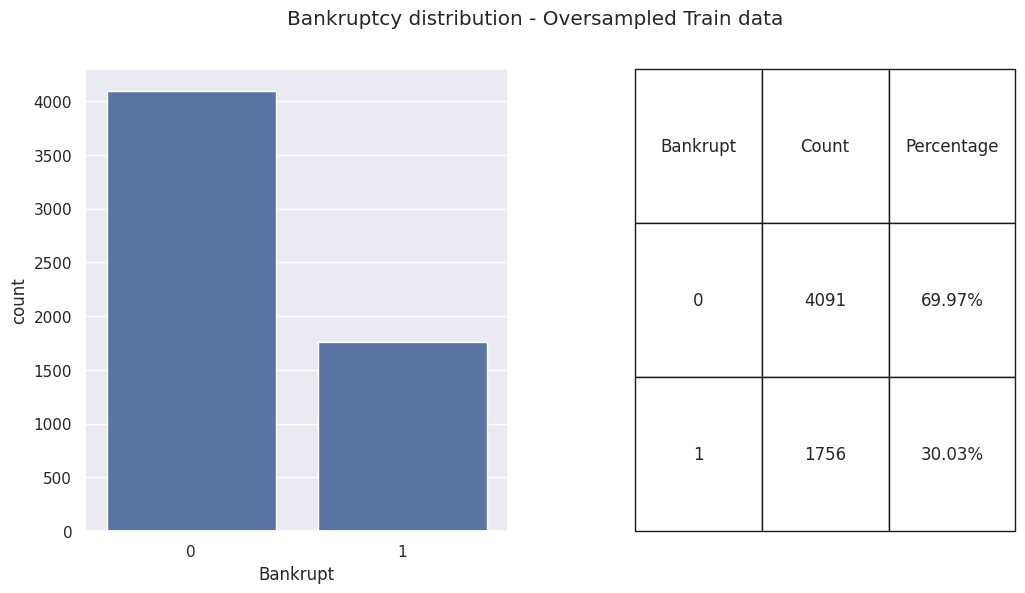

In [ ]:
# Calculate counts and percentages
count_df = train_os_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(train_os_df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=train_os_df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution - Oversampled Train data')
plt.show()

### Outliers Analysis

Lets think from Bankruptcy perspective 🏦
In our base dataset, only 3.23% companies are bankrupt (i.e 6599 Stable companies vs 220 Bankrupt companies).

Bankruptcy is a event occurs at a very small numbers in a normal economic condition in a stable economies. Thus Bankruptcy event is very rare, in technical terms we can say this event as outlier event.

In this context, if we remove outliers - There is a high chance that we might lose a valuable information. So we will not remove outliers.

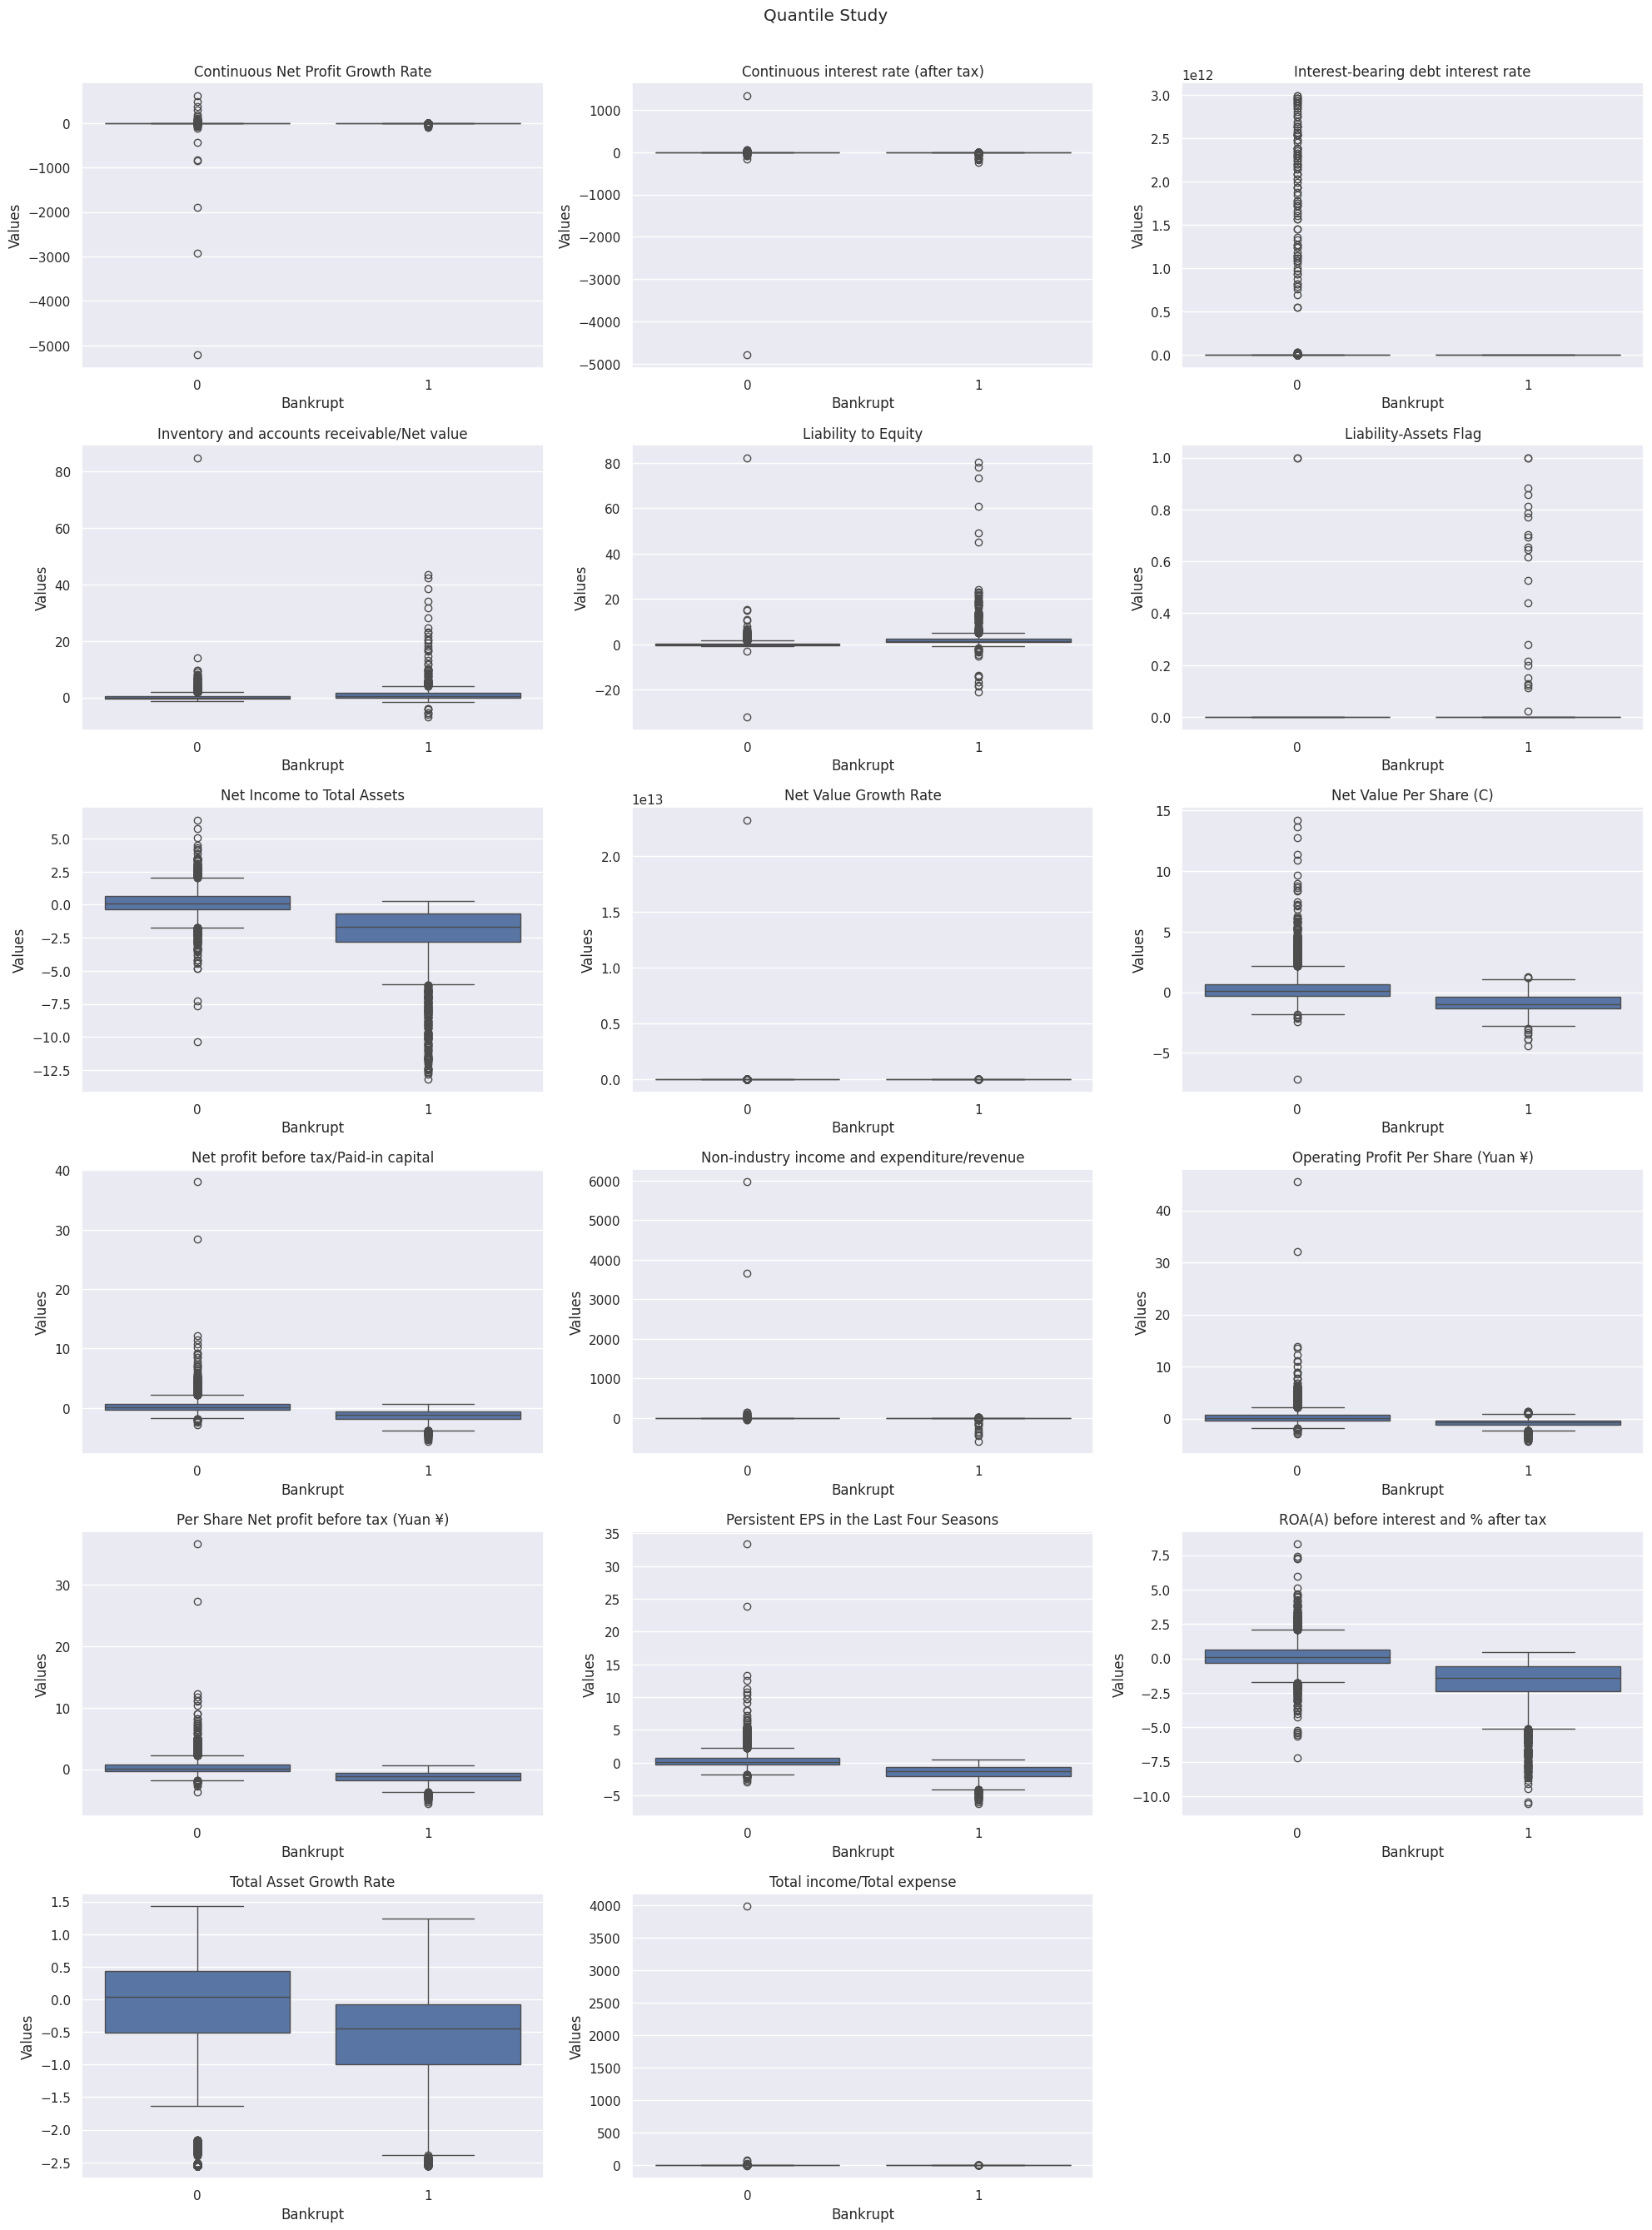

In [ ]:
# Create a new figure
fig = plt.figure(figsize=(20, 30))

# Iterate through each column in the given list
for i, col in enumerate(selected_features_final, start=1):
    plt.subplot(7,3, i)

    # Plot the boxplot for the current column using Seaborn
    sns.boxplot(data = train_os_df ,y=col, x= "Bankrupt" ,orient='v')

    # Set labels and title
    plt.title(col)
    plt.ylabel('Values')
    plt.xlabel('Bankrupt')

plt.tight_layout()
fig.subplots_adjust(top=0.99)
fig.suptitle("Quantile Study",y = 1.02)
plt.show()

**Observations :**
We can notice a clear IQR difference b/w Bankrupt and Non Bankrupt companies in features like Per share net profit, Borrowing dependency, Equity to liability ratio, etc.

### 🧪Oversampling test data

Before building our different types of ML models, lets take a quick look at test data's target value distribution.

Because of data imbalance in the overall dataset, it is good to ensure enough number of samples to validate our model. In such cases, we will apply oversampling algorithm to test data.

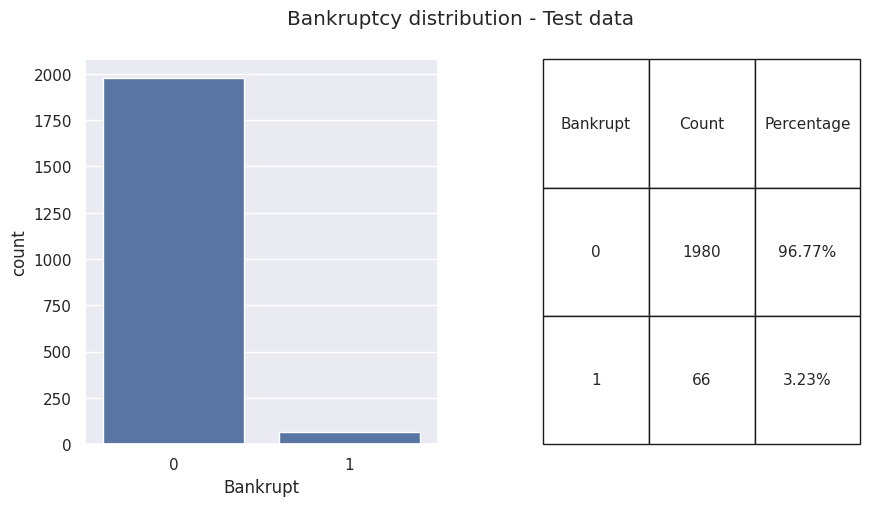

In [ ]:
# Calculate counts and percentages
count_df = y_test.value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(y_test)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=pd.DataFrame(y_test), order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution - Test data')
plt.show()

We will apply same oversampling algorithm and parameters to generate more test samples. Same algorithm and parameters are used as train data, assuming train and test samples are representative.

In [ ]:
X_test_os, y_test_os = oversample_data(oversampler_obj_final,scaler_obj.transform(X_test),y_test)

# Oversampled train dataframe
test_os_df = pd.DataFrame(X_test_os,columns = X_test.columns)
test_os_df['Bankrupt'] = y_test_os

del(X_test_os,y_test_os)

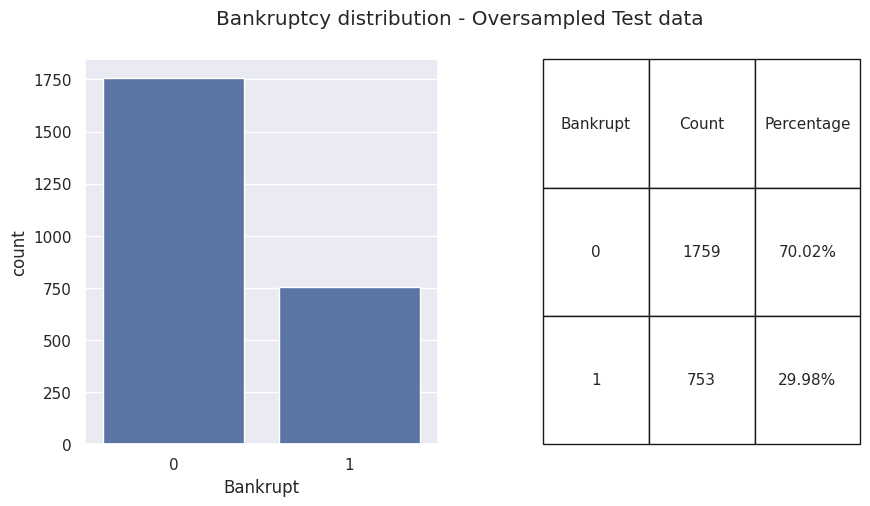

In [ ]:
# Calculate counts and percentages
count_df = test_os_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(test_os_df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=test_os_df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution - Oversampled Test data')
plt.show()

In [ ]:
print("Features used to build a model : ",selected_features_final)

Features used to build a model :  ['Continuous Net Profit Growth Rate', 'Continuous interest rate (after tax)', 'Interest-bearing debt interest rate', 'Inventory and accounts receivable/Net value', 'Liability to Equity', 'Liability-Assets Flag', 'Net Income to Total Assets', 'Net Value Growth Rate', 'Net Value Per Share (C)', 'Net profit before tax/Paid-in capital', 'Non-industry income and expenditure/revenue', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Persistent EPS in the Last Four Seasons', 'ROA(A) before interest and % after tax', 'Total Asset Growth Rate', 'Total income/Total expense']


### Find a Model

In [ ]:
X_train_os = train_os_df[selected_features_final]
y_train_os = train_os_df.Bankrupt.astype(int)

In [ ]:
X_test_final = pd.DataFrame(test_os_df[selected_features_final],columns=selected_features_final)
y_test_final = test_os_df.Bankrupt.astype(int)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_os, X_test_final, y_train_os, y_test_final)
models

 97%|█████████▋| 28/29 [00:14<00:00,  2.92it/s]

[LightGBM] [Info] Number of positive: 1756, number of negative: 4091
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4089
[LightGBM] [Info] Number of data points in the train set: 5847, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300325 -> initscore=-0.845751
[LightGBM] [Info] Start training from score -0.845751


100%|██████████| 29/29 [00:14<00:00,  2.00it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.83,0.87,0.87,0.84,0.03
Perceptron,0.87,0.87,0.87,0.87,0.04
LGBMClassifier,0.91,0.86,0.86,0.91,0.40
AdaBoostClassifier,0.90,0.86,0.86,0.89,0.77
SVC,0.90,0.85,0.85,0.89,0.68
ExtraTreesClassifier,0.90,0.85,0.85,0.90,0.80
RandomForestClassifier,0.90,0.85,0.85,0.90,1.45
SGDClassifier,0.89,0.85,0.85,0.89,0.06
NearestCentroid,0.87,0.85,0.85,0.87,0.03


**Conclusion**:

Based on the result, we will choose **LGBM Classifier**, **Random Forest** and **XGBoost** for further analysis

### LGBM Classifier

In [ ]:
# Initialize the LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train_os, y_train_os)

# Make predictions
lgbm_predictions = lgbm_model.predict(X_test_final)

# Evaluate the model (example using accuracy_score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_final, lgbm_predictions)
print(f"Accuracy of LGBMClassifier: {accuracy}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1756, number of negative: 4091
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4088
[LightGBM] [Info] Number of data points in the train set: 5847, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300325 -> initscore=-0.845751
[LightGBM] [Info] Start training from score -0.845751
Accuracy of LGBMClassifier: 0.9068471337579618


In [ ]:
# Predict
y_pred = lgbm_model.predict_proba(X_test_final)
# y_pred = ml_model.predict_proba(pd.DataFrame(input_scaler_func(X_test[selected_features_final]),columns = selected_features_final))

# Saving prediction in a dataframe
y_test_pred_prob = pd.DataFrame(y_pred,columns=["0","1"])

# Providing threshold as 0.5
final_prediction_threshold = 0.5
y_test_pred_prob["Prediction"] = y_test_pred_prob["1"] > final_prediction_threshold
y_test_pred_prob["Prediction"] = y_test_pred_prob["Prediction"].astype(int)
y_test_pred_prob["True_Class"] = y_test_final

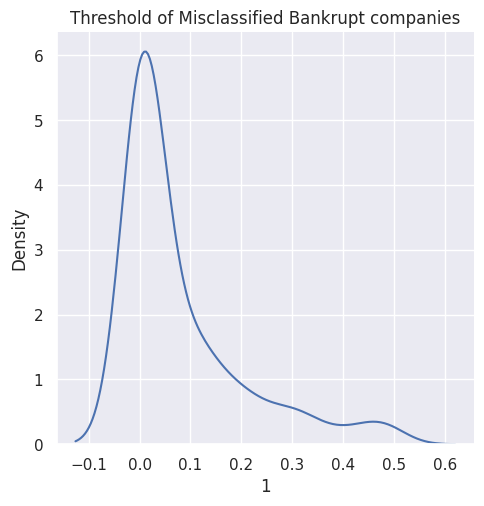

In [ ]:
sns.displot(data=y_test_pred_prob[(y_test_pred_prob.Prediction == 0) & (y_test_pred_prob.True_Class == 1)], x="1", kind="kde")
plt.title("Threshold of Misclassified Bankrupt companies")
plt.show()

In [ ]:
print(classification_report(y_true = y_test_pred_prob.True_Class, y_pred = y_test_pred_prob.Prediction))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1759
           1       0.95      0.73      0.82       753

    accuracy                           0.91      2512
   macro avg       0.92      0.86      0.88      2512
weighted avg       0.91      0.91      0.90      2512



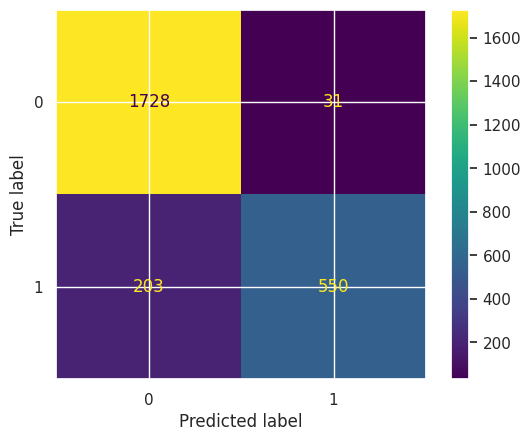

In [ ]:
cm = confusion_matrix(y_test_pred_prob.True_Class, y_test_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Random Forest

In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_os, y_train_os)

# Make predictions
rf_predictions = rf_classifier.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test_final, rf_predictions)
print(f"Accuracy of RandomForestClassifier: {accuracy}")

print(classification_report(y_test_final, rf_predictions))

Accuracy of RandomForestClassifier: 0.9056528662420382
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1759
           1       0.95      0.72      0.82       753

    accuracy                           0.91      2512
   macro avg       0.92      0.85      0.88      2512
weighted avg       0.91      0.91      0.90      2512



In [ ]:
# Predict
y_pred = rf_classifier.predict_proba(X_test_final)

# Saving prediction in a dataframe
y_test_pred_prob = pd.DataFrame(y_pred,columns=["0","1"])

# Providing threshold as 0.5
final_prediction_threshold = 0.5
y_test_pred_prob["Prediction"] = y_test_pred_prob["1"] > final_prediction_threshold
y_test_pred_prob["Prediction"] = y_test_pred_prob["Prediction"].astype(int)
y_test_pred_prob["True_Class"] = y_test_final

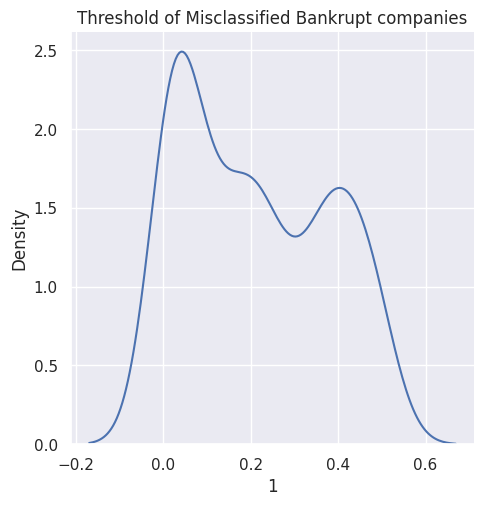

In [ ]:
sns.displot(data=y_test_pred_prob[(y_test_pred_prob.Prediction == 0) & (y_test_pred_prob.True_Class == 1)], x="1", kind="kde")
plt.title("Threshold of Misclassified Bankrupt companies")
plt.show()

In [ ]:
print(classification_report(y_true = y_test_pred_prob.True_Class, y_pred = y_test_pred_prob.Prediction))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1759
           1       0.95      0.72      0.82       753

    accuracy                           0.91      2512
   macro avg       0.92      0.85      0.88      2512
weighted avg       0.91      0.91      0.90      2512



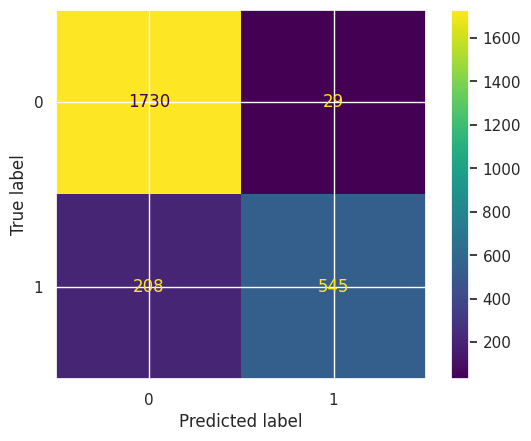

In [ ]:
cm = confusion_matrix(y_test_pred_prob.True_Class, y_test_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### 🤖 XGBoost

In [ ]:
# Define the XGBoost classifier
xgb = XGBClassifier(random_state = 42)

# Define hyperparameters to search
params = {
    'n_estimators': [50,100,150,200],
    'max_depth': [3, 4, 5],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4]
}

# Perform random search
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=50, scoring='f1', cv=5, verbose=1, random_state=42)
random_search.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': array([0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='f1', verbose=1)

In [ ]:
# Print the best parameters found
print("Best score: ", round(random_search.best_score_,2))

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Get the best model
ml_model = random_search.best_estimator_

Best score:  0.97
Best parameters found:  {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1577777777777778, 'gamma': 0, 'colsample_bytree': 0.6}


In [ ]:
# Predicting probabilities for each train sample
y_train_pred_prob = ml_model.predict_proba(X_train_os)

# Saving prediction in a dataframe
y_train_pred_prob = pd.DataFrame(y_train_pred_prob,columns=["0","1"])

# Providing threshold as 0.5
y_train_pred_prob["Prediction"] = y_train_pred_prob["1"] > 0.5
y_train_pred_prob["Prediction"] = y_train_pred_prob["Prediction"].astype(int)
y_train_pred_prob["True_Class"] = y_train_os

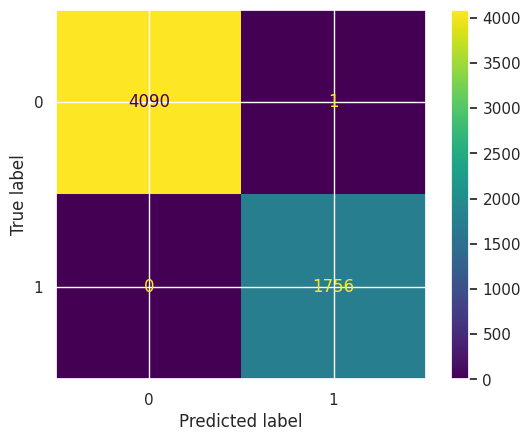

In [ ]:
cm = confusion_matrix(y_train_pred_prob.True_Class, y_train_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

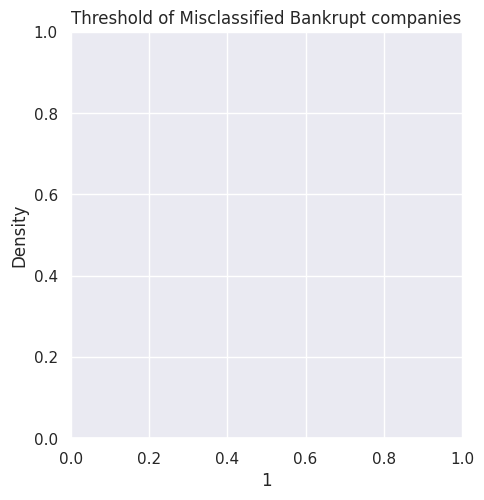

In [ ]:
sns.displot(data=y_train_pred_prob[(y_train_pred_prob.Prediction == 0) & (y_train_pred_prob.True_Class == 1)], x="1", kind="kde")
plt.title("Threshold of Misclassified Bankrupt companies")
plt.show()

In [ ]:
# Set final threshold here
final_prediction_threshold = 0.5

In [ ]:
# Providing threshold as 0.5
y_train_pred_prob["Prediction"] = y_train_pred_prob["1"] > final_prediction_threshold
y_train_pred_prob["Prediction"] = y_train_pred_prob["Prediction"].astype(int)
y_train_pred_prob["True_Class"] = y_train_os

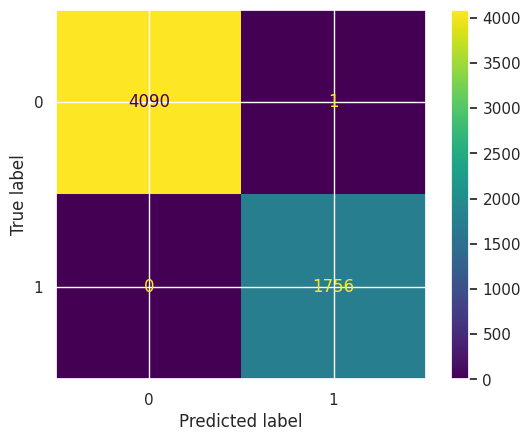

In [ ]:
cm = confusion_matrix(y_train_pred_prob.True_Class, y_train_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Prediction on test data

In [ ]:
# Predict
y_pred = ml_model.predict_proba(X_test_final)
# y_pred = ml_model.predict_proba(pd.DataFrame(input_scaler_func(X_test[selected_features_final]),columns = selected_features_final))

# Saving prediction in a dataframe
y_test_pred_prob = pd.DataFrame(y_pred,columns=["0","1"])

# Providing threshold as 0.5
y_test_pred_prob["Prediction"] = y_test_pred_prob["1"] > final_prediction_threshold
y_test_pred_prob["Prediction"] = y_test_pred_prob["Prediction"].astype(int)
y_test_pred_prob["True_Class"] = y_test_final

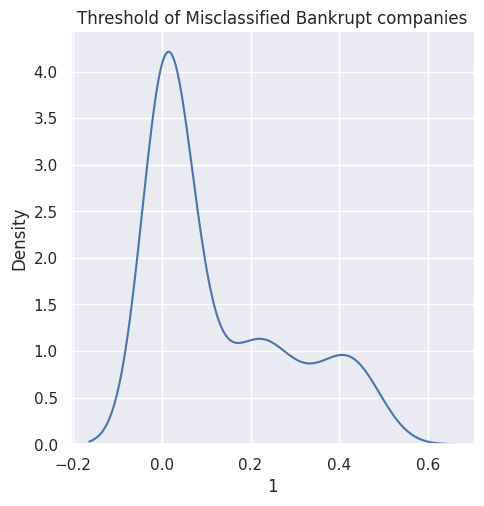

In [ ]:
sns.displot(data=y_test_pred_prob[(y_test_pred_prob.Prediction == 0) & (y_test_pred_prob.True_Class == 1)], x="1", kind="kde")
plt.title("Threshold of Misclassified Bankrupt companies")
plt.show()

In [ ]:
print(classification_report(y_true = y_test_pred_prob.True_Class, y_pred = y_test_pred_prob.Prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1759
           1       0.95      0.74      0.83       753

    accuracy                           0.91      2512
   macro avg       0.92      0.86      0.88      2512
weighted avg       0.91      0.91      0.91      2512



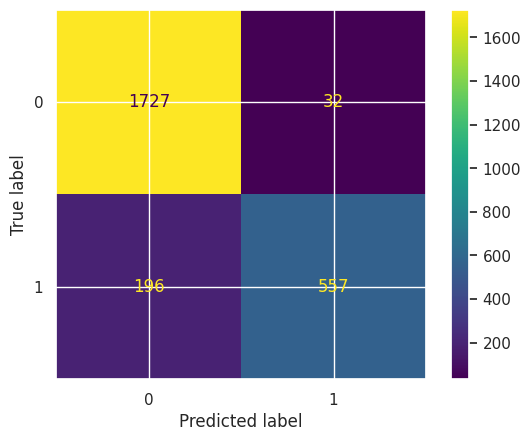

In [ ]:
cm = confusion_matrix(y_test_pred_prob.True_Class, y_test_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': ml_model.feature_names_in_, 'Importance': ml_model.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
13,Persistent EPS in the Last Four Seasons,0.30
4,Liability to Equity,0.20
1,Continuous interest rate (after tax),0.11
6,Net Income to Total Assets,0.05
2,Interest-bearing debt interest rate,0.05
10,Non-industry income and expenditure/revenue,0.04
16,Total income/Total expense,0.03
7,Net Value Growth Rate,0.03
9,Net profit before tax/Paid-in capital,0.03
12,Per Share Net profit before tax (Yuan ¥),0.03


### Conclusion:

The analysis of feature importance reveals that the **Persistent EPS in the Last Four Seasons** is the most significant predictor, with an importance score of **0.296435**. Following closely, **Liability to Equity** holds considerable predictive power at **0.202134**. Other notable features include the **Continuous interest rate (after tax)** and **Net Income to Total Assets**, with scores of **0.112811** and **0.051784**, respectively.

Several features, such as **Net Value Growth Rate** and **Operating Profit Per Share**, contribute to the model but with lower importance scores, indicating they have a more minor role in predictions. Notably, the **Liability-Assets Flag** has a score of **0.000000**, suggesting it does not contribute to the predictive power of the model at all.